## Graduate Rotational Internship Program 2021

## Task name :  Prediction using Supervised ML

## Perform by : Mohammed Away Toumi

<img src="task1.png"/>

## Step 1 : Importing the dataset

In this step, we will import the dataset through the link with the help of pandas library and then we will observe the data

In [4]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
# Reading data from remote link
data = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(data)

In [7]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [9]:
# To find the number of columns and rows
df.shape

(25, 2)

In [10]:
# To find more information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [11]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [12]:
# We will check if our dataset contains null or missings values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

As we can see we do not have any null values in our data set so we can now move on to step 2

## Step 2 : Visualizing the dataset

In this we will plot the dataset to check whether we can observe any relation between the two variables or not

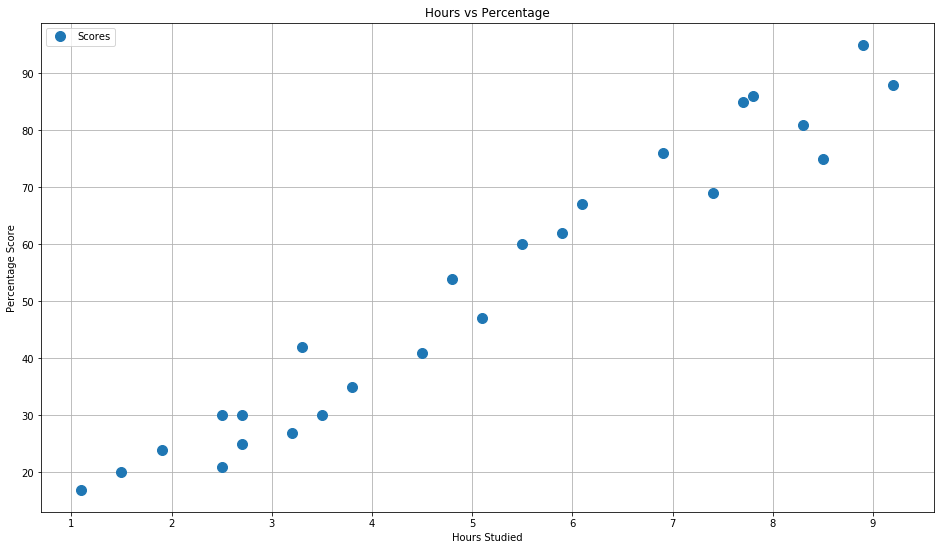

In [48]:
# Plotting the dataset
df.plot(x='Hours', y='Scores', style='o', markersize=10)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

### From the graph above, we can observe that there is a linear relationship between "hours studied" and "percentage score". So we can use linear regression supervised machine model on it to predict further values.

In [14]:
# we can also use .corr to determine the corelation between the variables
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Step 3 : Data preparation

In this step we will divise the data into "features" (inputs) and "labels" (outputs). After that we will split the whole dataset in 2 parts : training and testing data.

In [16]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [18]:
# Using iloc function we will divide the data
x = df.iloc[:,:1].values
y = df.iloc[:,1:].values

In [19]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [20]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [22]:
# splitting data into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Step 4 : Training the algorithm

We have splited our data into training and testing sets, and now we will train our model.

In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
print("Training complete.")

Training complete.


## Step 5 : Visualizing the model

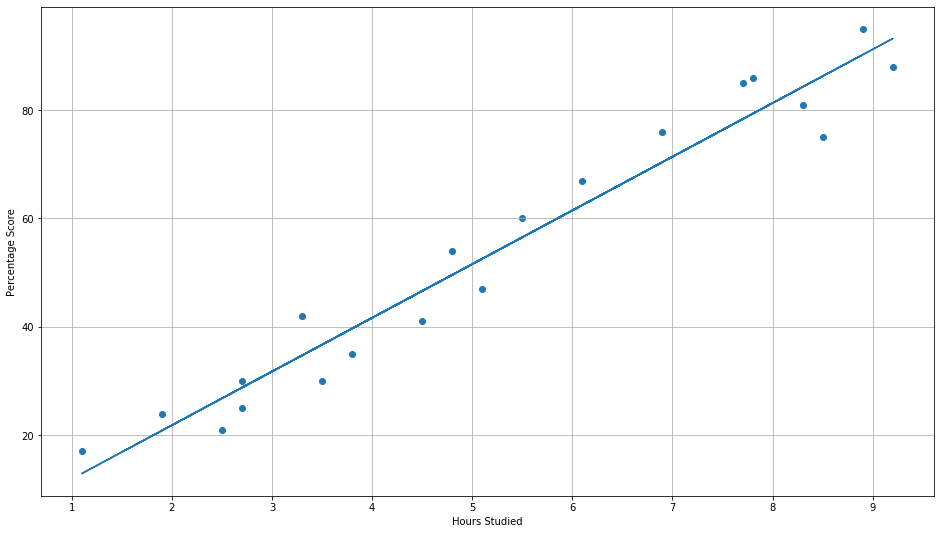

In [49]:
# Plotting the regression line
line = model.coef_*x + model.intercept_

# Plotting for the test data
plt.scatter(x_train, y_train)
plt.plot(x, line)
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

## Step 6 : Making Predictions

Now that we have trained our algorithm, it's time to make some predictions.

In [27]:
# Testing data - In Hours
print(x_test)
# Predicting the scores
y_pred = model.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [28]:
# Comparing actual vs predicted
y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

y_pred

In [57]:
# Comparing actual vs predicted
comp = pd.DataFrame({'Actual':[y_test], 'Predicted':[y_pred]})
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


In [31]:
# Testing with your own data
hours = 9.25
own_pred = model.predict([[hours]])
print('The predicted score if a person studies for',hours,'hours is',own_pred[0])

The predicted score if a person studies for 9.25 hours is [93.69173249]


We can be concluded that the predicted score if a person studies for 9.25 hours is 93.69173249.

## Step 7 : Evaluating the model

We are going to evaluate our trained model by calculating mean absolute error

In [32]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
